In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [ ]:
time_ax = np.linspace(0, 1/256*(256),257)

In [ ]:
type = "score"

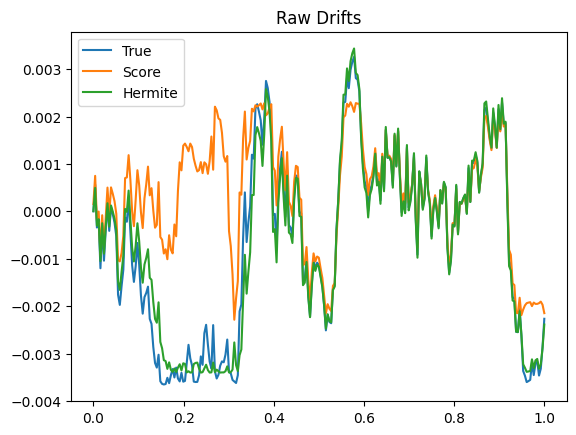

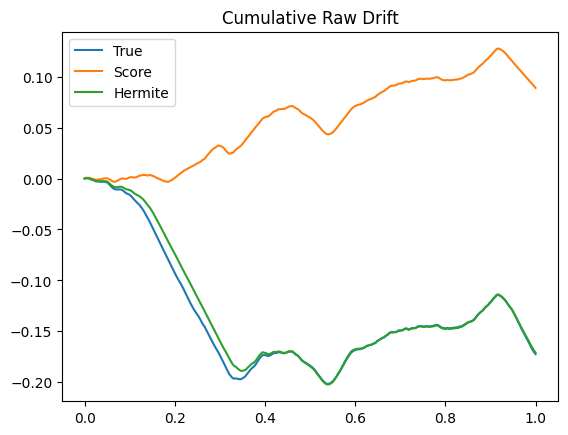

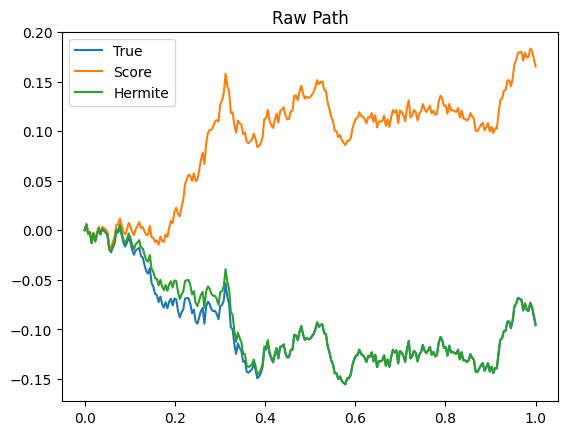

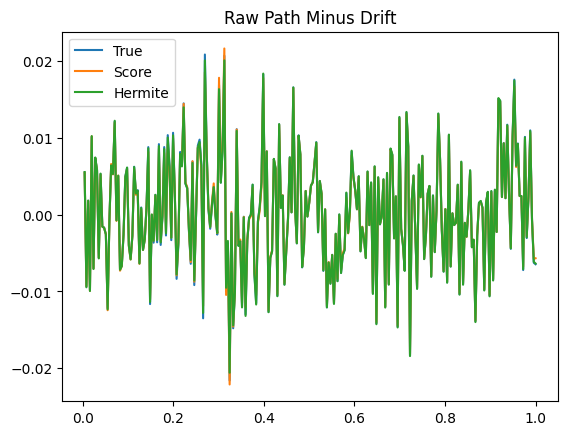

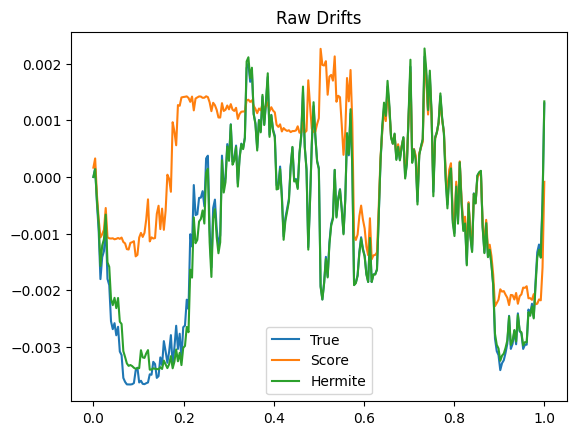

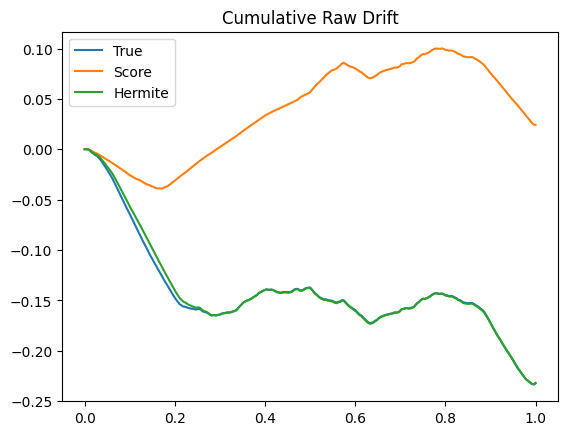

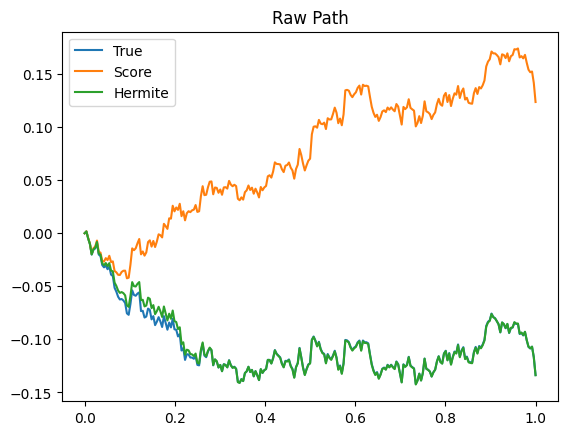

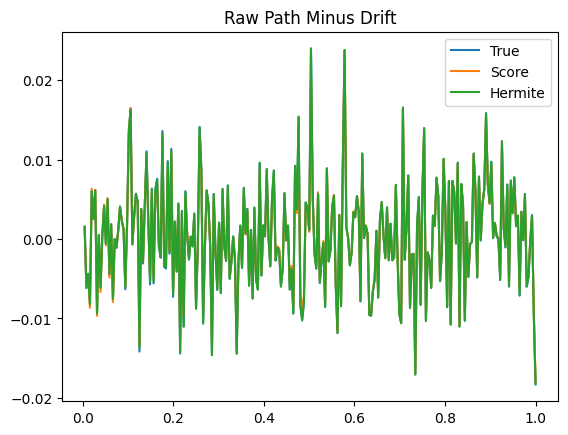

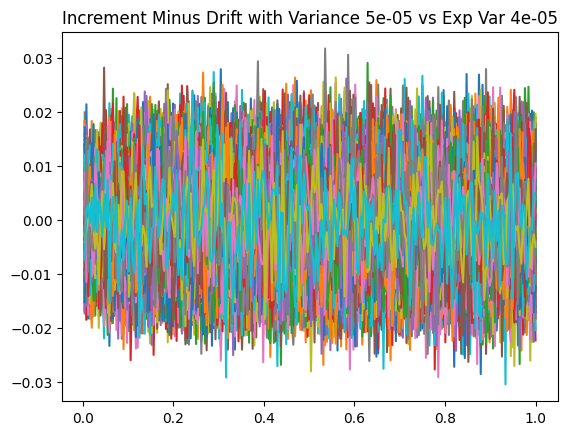

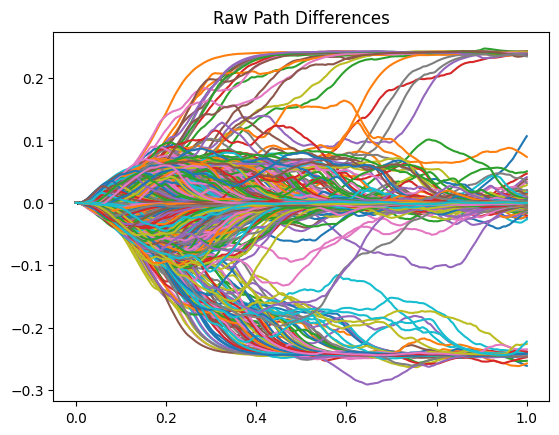

In [64]:
save_path = "/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/QuadSinHF_NewLongerDriftEvalExp_MSEs_10240NPaths_Diff01"
lownoise_score_drifts = np.load(save_path + f"_score_drifts.npy", allow_pickle=True)[:, :257, 0]
lownoise_hermite_drifts = np.load(save_path + f"_hermite_drifts.npy", allow_pickle=True)[:, :257, 0]
lownoise_true_drifts = np.load(save_path + "_true_drifts.npy", allow_pickle=True)[:, :257, 0]
lownoise_score_paths = np.load(save_path + f"_score_paths.npy", allow_pickle=True)[:, :257, 0]
lownoise_hermite_paths = np.load(save_path + f"_hermite_paths.npy", allow_pickle=True)[:, :257, 0]
lownoise_true_paths = np.load(save_path + "_true_paths.npy", allow_pickle=True)[:, :257, 0]
lownoise_score_diffs = lownoise_true_paths-lownoise_score_paths
idxs = np.argsort(np.abs(lownoise_score_diffs)[:, -1], axis=0).flatten()

lownoise_true_drifts = lownoise_true_drifts[idxs, :][::-1, :]/256
lownoise_score_drifts = lownoise_score_drifts[idxs, :][::-1,:]/256
lownoise_hermite_drifts = lownoise_hermite_drifts[idxs, :][::-1,:]/256

lownoise_true_paths = lownoise_true_paths[idxs, :][::-1, :]
lownoise_score_paths = lownoise_score_paths[idxs, :][::-1,:]
lownoise_hermite_paths = lownoise_hermite_paths[idxs, :][::-1,:]
for k in range(2):
    idx = np.arange(lownoise_score_paths.shape[0])[k]
    #assert (lownoise_score_diffs[k, :])[0] == 0.
    plt.plot(time_ax, (lownoise_true_drifts[idx, :]), label="True")
    plt.plot(time_ax, (lownoise_score_drifts[idx, :]), label="Score")
    plt.plot(time_ax, (lownoise_hermite_drifts[idx, :]), label="Hermite")
    plt.legend()
    plt.title("Raw Drifts")
    plt.show()
    plt.close()
    plt.plot(time_ax, np.cumsum(lownoise_true_drifts[idx, :]), label="True")
    plt.plot(time_ax, np.cumsum(lownoise_score_drifts[idx, :]), label="Score")
    plt.plot(time_ax, np.cumsum(lownoise_hermite_drifts[idx, :]), label="Hermite")
    plt.legend()
    plt.title("Cumulative Raw Drift")
    plt.show()
    plt.close()
    plt.plot(time_ax, (lownoise_true_paths[idx, :]), label="True")
    plt.plot(time_ax, (lownoise_score_paths[idx, :]), label="Score")
    plt.plot(time_ax, (lownoise_hermite_paths[idx, :]), label="Hermite")
    plt.legend()
    plt.title("Raw Path")
    plt.show()
    plt.close()
    plt.plot(time_ax[1:], np.diff(lownoise_true_paths[idx, :])-(lownoise_true_drifts[idx, 1:]), label="True")
    plt.plot(time_ax[1:], np.diff(lownoise_score_paths[idx, :])-(lownoise_score_drifts[idx, 1:]), label="Score")
    plt.plot(time_ax[1:], np.diff(lownoise_hermite_paths[idx, :]) - (lownoise_hermite_drifts[idx, 1:]), label="Hermite")
    plt.legend()
    plt.title("Raw Path Minus Drift")
    plt.show()
    plt.close()
for k in range(0, 1000):
    #assert (lownoise_true_paths[k, :]-lownoise_true_paths[k, :])[0] == 0.
    plt.plot(time_ax[1:], np.diff(lownoise_hermite_paths[k, :]) - (lownoise_hermite_drifts[k, 1:]), label="Score Difference")
plt.title(f"Increment Minus Drift with Variance {round(np.var(np.diff(lownoise_true_paths,axis=1)-(lownoise_true_drifts[:, 1:])),5)} vs Exp Var {round(0.01/256, 5)}")
plt.show()
plt.close()
for k in range(0, 1000):
    #assert (lownoise_true_paths[k, :]-lownoise_true_paths[k, :])[0] == 0.
    plt.plot(time_ax, (lownoise_true_paths[k, :]-lownoise_score_paths[k, :]), label="Score Difference")
plt.title("Raw Path Differences")
plt.show()
plt.close()

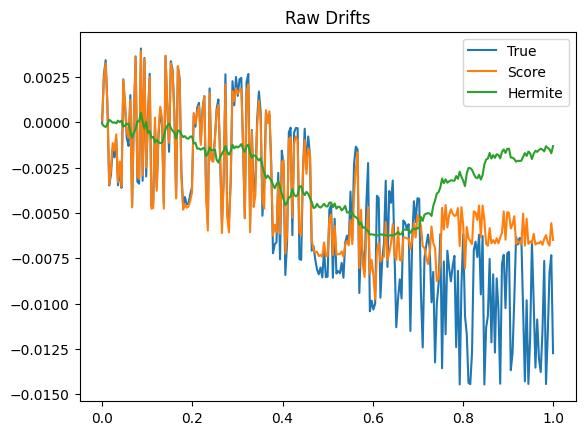

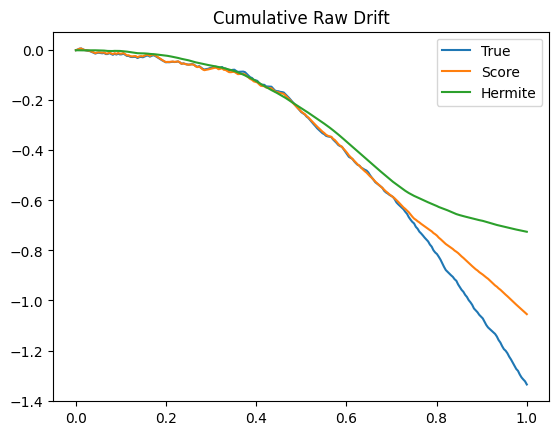

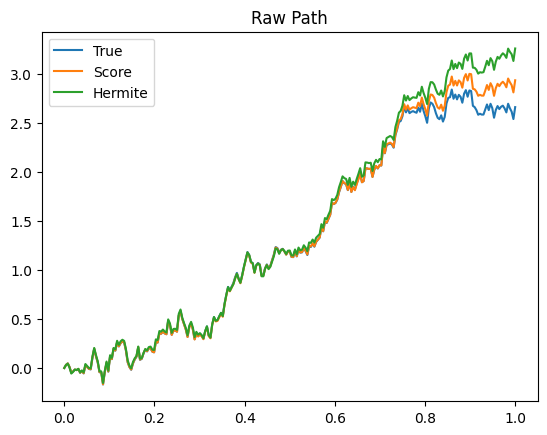

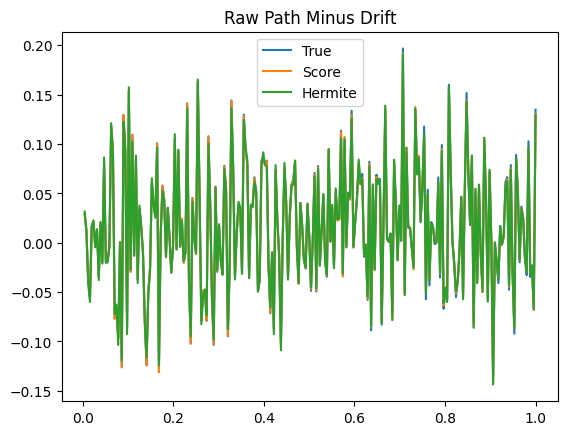

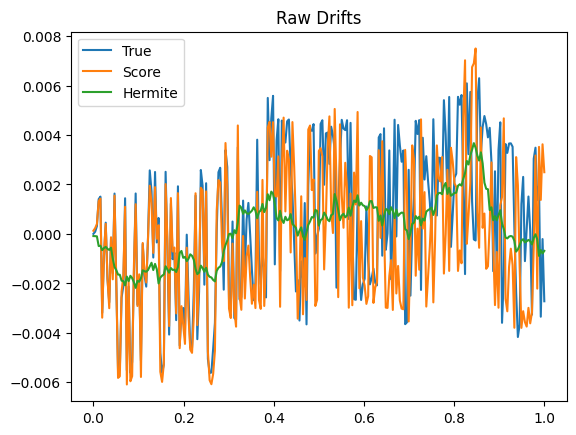

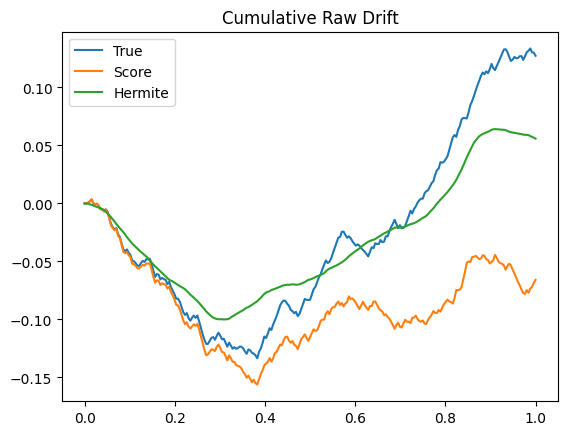

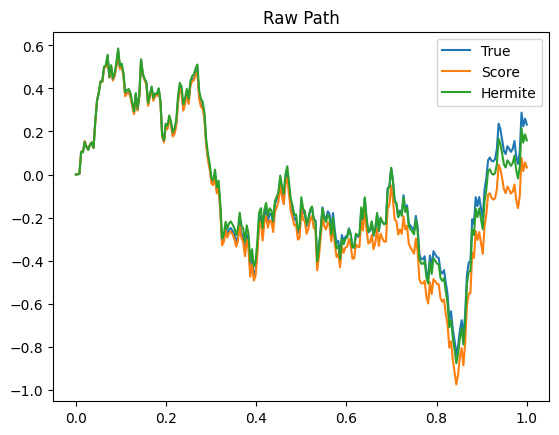

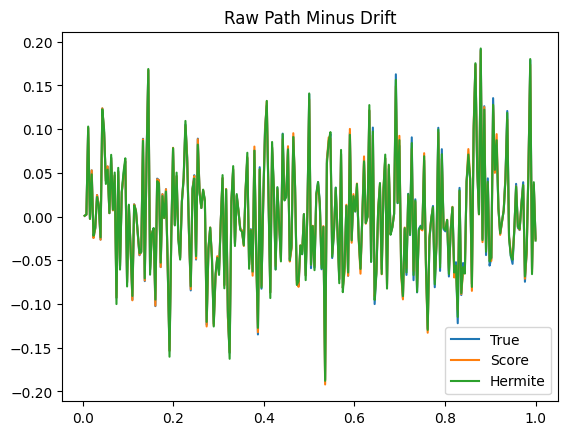

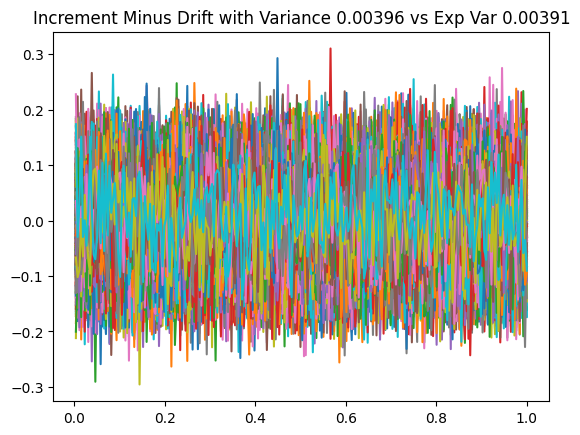

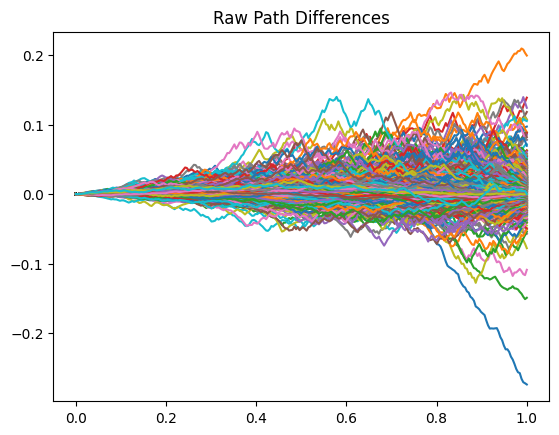

In [61]:
save_path = "/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/QuadSinHF_NewLongerDriftEvalExp_MSEs_10240NPaths"
normalnoise_score_drifts = np.load(save_path + f"_score_drifts.npy", allow_pickle=True)[:, :257, 0]
normalnoise_hermite_drifts = np.load(save_path + f"_hermite_drifts.npy", allow_pickle=True)[:, :257, 0]
normalnoise_true_drifts = np.load(save_path + "_true_drifts.npy", allow_pickle=True)[:, :257, 0]
normalnoise_score_paths = np.load(save_path + f"_score_paths.npy", allow_pickle=True)[:, :257, 0]
normalnoise_hermite_paths = np.load(save_path + f"_hermite_paths.npy", allow_pickle=True)[:, :257, 0]
normalnoise_true_paths = np.load(save_path + "_true_paths.npy", allow_pickle=True)[:, :257, 0]
normalnoise_score_diffs = normalnoise_true_paths-normalnoise_score_paths
idxs = np.argsort(np.abs(normalnoise_score_diffs)[:, -1], axis=0).flatten()

normalnoise_true_drifts = normalnoise_true_drifts[idxs, :][::-1, :]/256
normalnoise_score_drifts = normalnoise_score_drifts[idxs, :][::-1,:]/256
normalnoise_hermite_drifts = normalnoise_hermite_drifts[idxs, :][::-1,:]/256

normalnoise_true_paths = normalnoise_true_paths[idxs, :][::-1, :]
normalnoise_score_paths = normalnoise_score_paths[idxs, :][::-1,:]
normalnoise_hermite_paths = normalnoise_hermite_paths[idxs, :][::-1,:]
for k in range(2):
    idx = np.arange(normalnoise_score_paths.shape[0])[k]
    #assert (normalnoise_score_diffs[k, :])[0] == 0.
    plt.plot(time_ax, (normalnoise_true_drifts[idx, :]), label="True")
    plt.plot(time_ax, (normalnoise_score_drifts[idx, :]), label="Score")
    plt.plot(time_ax, (normalnoise_hermite_drifts[idx, :]), label="Hermite")
    plt.legend()
    plt.title("Raw Drifts")
    plt.show()
    plt.close()
    plt.plot(time_ax, np.cumsum(normalnoise_true_drifts[idx, :]), label="True")
    plt.plot(time_ax, np.cumsum(normalnoise_score_drifts[idx, :]), label="Score")
    plt.plot(time_ax, np.cumsum(normalnoise_hermite_drifts[idx, :]), label="Hermite")
    plt.legend()
    plt.title("Cumulative Raw Drift")
    plt.show()
    plt.close()
    plt.plot(time_ax, (normalnoise_true_paths[idx, :]), label="True")
    plt.plot(time_ax, (normalnoise_score_paths[idx, :]), label="Score")
    plt.plot(time_ax, (normalnoise_hermite_paths[idx, :]), label="Hermite")
    plt.legend()
    plt.title("Raw Path")
    plt.show()
    plt.close()
    plt.plot(time_ax[1:], np.diff(normalnoise_true_paths[idx, :])-(normalnoise_true_drifts[idx, 1:]), label="True")
    plt.plot(time_ax[1:], np.diff(normalnoise_score_paths[idx, :])-(normalnoise_score_drifts[idx, 1:]), label="Score")
    plt.plot(time_ax[1:], np.diff(normalnoise_hermite_paths[idx, :]) - (normalnoise_hermite_drifts[idx, 1:]), label="Hermite")
    plt.legend()
    plt.title("Raw Path Minus Drift")
    plt.show()
    plt.close()
for k in range(0, 1000):
    #assert (normalnoise_true_paths[k, :]-normalnoise_true_paths[k, :])[0] == 0.
    plt.plot(time_ax[1:], np.diff(normalnoise_hermite_paths[k, :]) - (normalnoise_hermite_drifts[k, 1:]), label="Score Difference")
plt.title(f"Increment Minus Drift with Variance {round(np.var(np.diff(normalnoise_true_paths,axis=1)-(normalnoise_true_drifts[:, 1:])),5)} vs Exp Var {round(1/256, 5)}")
plt.show()
plt.close()
for k in range(0, 1000):
    #assert (normalnoise_true_paths[k, :]-normalnoise_true_paths[k, :])[0] == 0.
    plt.plot(time_ax, (normalnoise_true_paths[k, :]-normalnoise_score_paths[k, :]), label="Score Difference")
plt.title("Raw Path Differences")
plt.show()
plt.close()

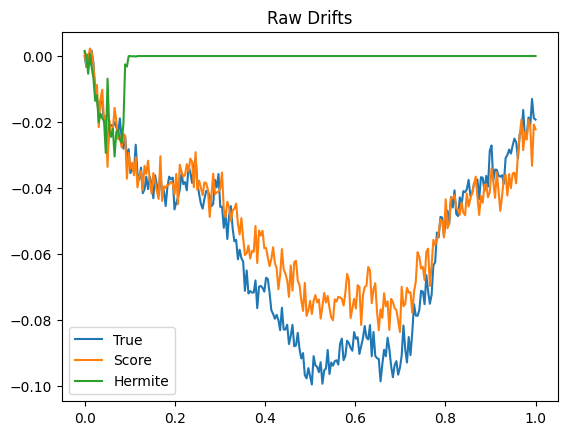

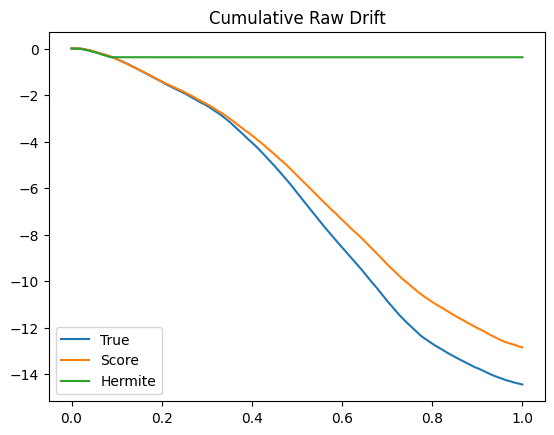

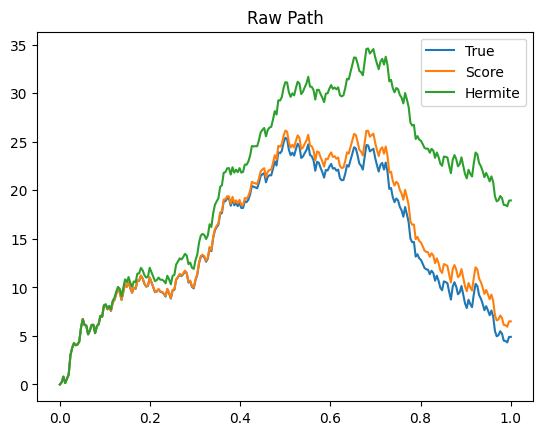

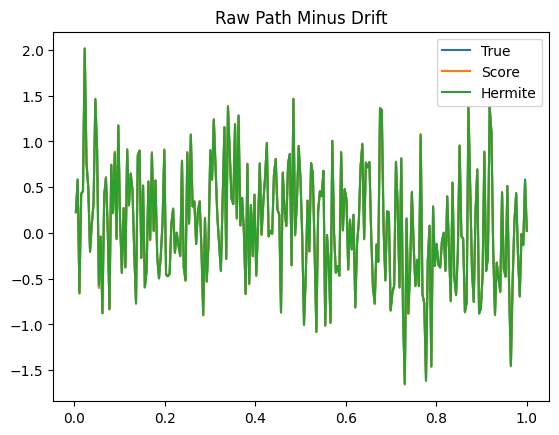

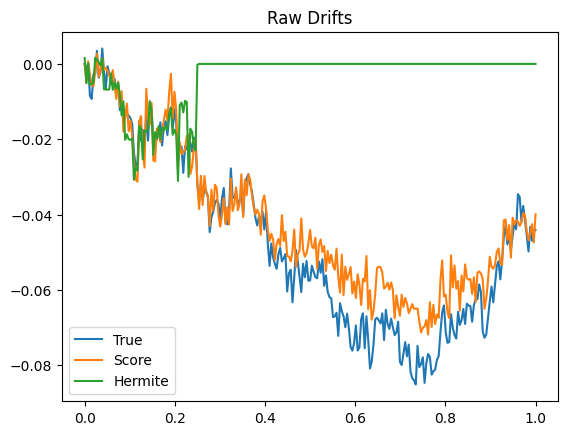

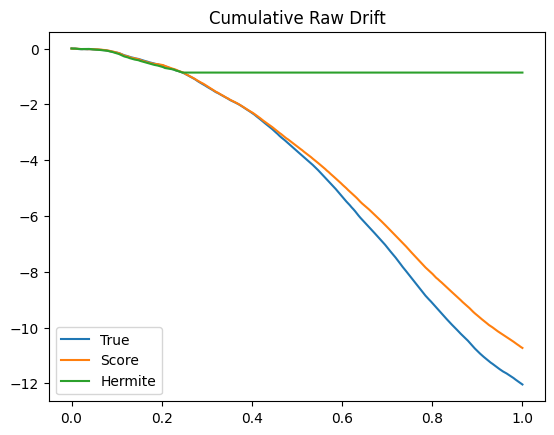

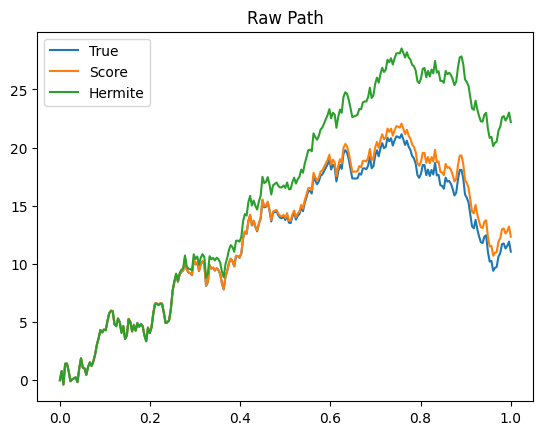

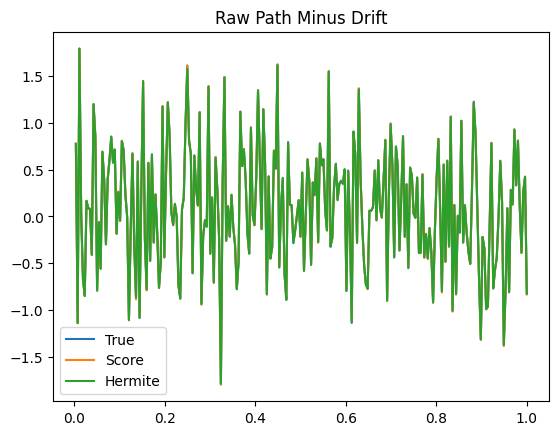

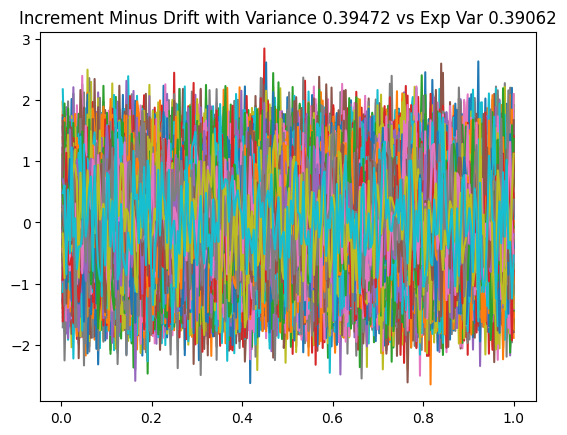

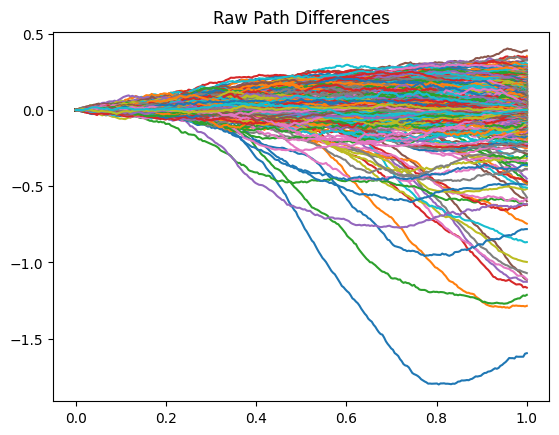

In [63]:
save_path = "/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/QuadSinHF_NewLongerDriftEvalExp_MSEs_10240NPaths_Diff100"
highnoise_score_drifts = np.load(save_path + f"_score_drifts.npy", allow_pickle=True)[:, :257, 0]
highnoise_hermite_drifts = np.load(save_path + f"_hermite_drifts.npy", allow_pickle=True)[:, :257, 0]
highnoise_true_drifts = np.load(save_path + "_true_drifts.npy", allow_pickle=True)[:, :257, 0]
highnoise_score_paths = np.load(save_path + f"_score_paths.npy", allow_pickle=True)[:, :257, 0]
highnoise_hermite_paths = np.load(save_path + f"_hermite_paths.npy", allow_pickle=True)[:, :257, 0]
highnoise_true_paths = np.load(save_path + "_true_paths.npy", allow_pickle=True)[:, :257, 0]
highnoise_score_diffs = highnoise_true_paths-highnoise_score_paths
idxs = np.argsort(np.abs(highnoise_score_diffs)[:, -1], axis=0).flatten()

highnoise_true_drifts = highnoise_true_drifts[idxs, :][::-1, :]/256
highnoise_score_drifts = highnoise_score_drifts[idxs, :][::-1,:]/256
highnoise_hermite_drifts = highnoise_hermite_drifts[idxs, :][::-1,:]/256

highnoise_true_paths = highnoise_true_paths[idxs, :][::-1, :]
highnoise_score_paths = highnoise_score_paths[idxs, :][::-1,:]
highnoise_hermite_paths = highnoise_hermite_paths[idxs, :][::-1,:]
for k in range(2):
    idx = np.arange(highnoise_score_paths.shape[0])[k]
    #assert (highnoise_score_diffs[k, :])[0] == 0.
    plt.plot(time_ax, (highnoise_true_drifts[idx, :]), label="True")
    plt.plot(time_ax, (highnoise_score_drifts[idx, :]), label="Score")
    plt.plot(time_ax, (highnoise_hermite_drifts[idx, :]), label="Hermite")
    plt.legend()
    plt.title("Raw Drifts")
    plt.show()
    plt.close()
    plt.plot(time_ax, np.cumsum(highnoise_true_drifts[idx, :]), label="True")
    plt.plot(time_ax, np.cumsum(highnoise_score_drifts[idx, :]), label="Score")
    plt.plot(time_ax, np.cumsum(highnoise_hermite_drifts[idx, :]), label="Hermite")
    plt.legend()
    plt.title("Cumulative Raw Drift")
    plt.show()
    plt.close()
    plt.plot(time_ax, (highnoise_true_paths[idx, :]), label="True")
    plt.plot(time_ax, (highnoise_score_paths[idx, :]), label="Score")
    plt.plot(time_ax, (highnoise_hermite_paths[idx, :]), label="Hermite")
    plt.legend()
    plt.title("Raw Path")
    plt.show()
    plt.close()
    plt.plot(time_ax[1:], np.diff(highnoise_true_paths[idx, :])-(highnoise_true_drifts[idx, 1:]), label="True")
    plt.plot(time_ax[1:], np.diff(highnoise_score_paths[idx, :])-(highnoise_score_drifts[idx, 1:]), label="Score")
    plt.plot(time_ax[1:], np.diff(highnoise_hermite_paths[idx, :]) - (highnoise_hermite_drifts[idx, 1:]), label="Hermite")
    plt.legend()
    plt.title("Raw Path Minus Drift")
    plt.show()
    plt.close()
for k in range(0, 1000):
    #assert (highnoise_true_paths[k, :]-highnoise_true_paths[k, :])[0] == 0.
    plt.plot(time_ax[1:], np.diff(highnoise_hermite_paths[k, :]) - (highnoise_hermite_drifts[k, 1:]), label="Score Difference")
plt.title(f"Increment Minus Drift with Variance {round(np.var(np.diff(highnoise_true_paths,axis=1)-(highnoise_true_drifts[:, 1:])),5)} vs Exp Var {round(100/256, 5)}")
plt.show()
plt.close()
for k in range(0, 1000):
    #assert (highnoise_true_paths[k, :]-highnoise_true_paths[k, :])[0] == 0.
    plt.plot(time_ax, (highnoise_true_paths[k, :]-highnoise_score_paths[k, :]), label="Score Difference")
plt.title("Raw Path Differences")
plt.show()
plt.close()

In [ ]:
lownoise_mean = np.nanmean(np.abs(lownoise_true_paths-lownoise_score_paths)/np.sqrt(time_ax[np.newaxis,:]), axis=0)
normalnoise_mean = np.nanmean(np.abs(normalnoise_true_paths-normalnoise_score_paths)/np.sqrt(time_ax[np.newaxis,:]), axis=0)
highnoise_mean = np.nanmean(np.abs(highnoise_true_paths-highnoise_score_paths)/np.sqrt(time_ax[np.newaxis,:]), axis=0)
plt.plot(time_ax[1:], lownoise_mean[1:], label="LowNoise")
plt.plot(time_ax[1:], normalnoise_mean[1:], label="NormalNoise")
plt.plot(time_ax[1:], highnoise_mean[1:], label="HighNoise")
plt.legend(loc="lower right")
plt.yscale("log")
plt.show()
plt.close()

In [ ]:
lownoise_diff = (lownoise_true_paths-lownoise_score_paths)/np.sqrt(time_ax[np.newaxis,:])
normalnoise_diff = (normalnoise_true_paths-normalnoise_score_paths)/np.sqrt(time_ax[np.newaxis,:])
highnoise_diff = (highnoise_true_paths-highnoise_score_paths)/np.sqrt(time_ax[np.newaxis,:])
plt.scatter(lownoise_true_paths.flatten(), lownoise_diff.flatten(), label="LowNoise")
plt.legend()
plt.show()
plt.close()
plt.scatter(normalnoise_true_paths.flatten(), normalnoise_diff.flatten(), label="NormalNoise")
plt.legend()
plt.show()
plt.close()
plt.scatter(highnoise_true_paths.flatten(), highnoise_diff.flatten(), label="HighNoise")
plt.legend()
plt.show()
plt.close()